# Day in The Life of a Data Analyst

SQL file

In [1]:
# Run this to import the data into DataFrames
import pandas as pd

author_import = pd.read_csv("data/author_info.csv")
game_import = pd.read_csv("data/game_info.csv")
purchase_import = pd.read_csv("data/purchase_info.csv")
review_import = pd.read_csv("data/review_info.csv")

In [2]:
df_1 = _deepnote_execute_sql('select * \nfrom author_import\n-- from review_import \n-- from game_import\n-- from review_import\nlimit 10 \n\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

,review_id,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,68675252,76561198199699706,56,3,5552.0,0.0,5517.0,1.588775e+09
1,68675154,76561198320854803,112,8,33707.0,0.0,27915.0,1.593310e+09
2,68674806,76561198282201987,17,9,3166.0,0.0,2633.0,1.603555e+09
3,68673945,76561199016358734,3,2,6579.0,0.0,3569.0,1.608999e+09
4,68673504,76561198125284145,1001,46,199.0,0.0,65.0,1.590811e+09
5,68673403,76561198270161210,35,4,401.0,0.0,401.0,1.586809e+09
6,68672722,76561198058209736,67,8,7098.0,0.0,4287.0,1.598826e+09
7,68672192,76561198137909668,25,3,3949.0,0.0,2358.0,1.596881e+09
8,68670882,76561198236134140,39,5,10588.0,0.0,10441.0,1.593180e+09
9,68669904,76561198008177082,55,11,2057.0,0.0,1671.0,1.588877e+09


In [3]:
full_dataset = _deepnote_execute_sql('-- Let us combine our valuable columns into a single dataframe\n\n\nSELECT\nreview_id, \ncast("author.steamid" as varchar(20)) as author_steamid, \n"author.num_games_owned" as author_num_games_owned,\n"author.num_reviews" as author_num_reviews, \n"author.playtime_forever" as author_playtime_forever,\n"author.playtime_last_two_weeks" as author_playtime_last_two_weeks,\n"author.playtime_at_review"as author_playtime_forever ,\n"author.last_played" as author_last_played ,\n-- Game import data\napp_id, \napp_name,\n-- review import data\nlanguage,\nreview,\ntimestamp_created,\ntimestamp_updated,\nrecommended,\nvotes_helpful,\nvotes_funny,\nweighted_vote_score,\ncomment_count,\n-- purchase import data\nsteam_purchase,\nreceived_for_free,\nwritten_during_early_access\nFROM author_import  \ninner join game_import \nusing(review_id)\ninner join review_import\nusing(review_id)\ninner join purchase_import\nusing(review_id)\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
full_dataset

,review_id,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_forever_2,author_last_played,app_id,app_name,...,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,68675252,76561198199699706,56,3,5552.0,0.0,5517.0,1.588775e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1588772815,1588772815,True,0,0,0.000000,0,False,False,False
1,68675154,76561198320854803,112,8,33707.0,0.0,27915.0,1.593310e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1588772690,1588772690,True,0,0,0.000000,0,True,False,False
2,68674806,76561198282201987,17,9,3166.0,0.0,2633.0,1.603555e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1588772228,1591709306,True,1,0,0.523810,0,True,False,False
3,68673945,76561199016358734,3,2,6579.0,0.0,3569.0,1.608999e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1588771138,1588771138,True,0,0,0.000000,0,False,False,False
4,68673403,76561198270161210,35,4,401.0,0.0,401.0,1.586809e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1588770478,1588770478,True,1,0,0.523810,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,47315512,76561198049365582,455,29,136.0,0.0,136.0,1.544144e+09,517630,Just Cause 4,...,1544045347,1544047235,False,1,0,0.481481,0,False,False,False
999996,47315077,76561198170407438,87,1,1104.0,0.0,852.0,1.590757e+09,517630,Just Cause 4,...,1544043611,1544043611,False,13,1,0.559949,0,False,False,False
999997,47310647,76561197995045021,307,3,100.0,0.0,100.0,1.544024e+09,517630,Just Cause 4,...,1544025901,1544025901,False,11,1,0.532164,0,True,False,False
999998,47310491,76561197970777241,1316,12,377.0,0.0,150.0,1.547993e+09,517630,Just Cause 4,...,1544025339,1544025339,False,25,1,0.627383,0,False,False,False


In [4]:
df_6 = _deepnote_execute_sql('select * \nfrom full_dataset\nlimit 10', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_6

,review_id,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_forever_2,author_last_played,app_id,app_name,...,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,68675252,76561198199699706,56,3,5552.0,0.0,5517.0,1.588775e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1588772815,1588772815,True,0,0,0.00000,0,False,False,False
1,68675154,76561198320854803,112,8,33707.0,0.0,27915.0,1.593310e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1588772690,1588772690,True,0,0,0.00000,0,True,False,False
2,68674806,76561198282201987,17,9,3166.0,0.0,2633.0,1.603555e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1588772228,1591709306,True,1,0,0.52381,0,True,False,False
3,68673945,76561199016358734,3,2,6579.0,0.0,3569.0,1.608999e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1588771138,1588771138,True,0,0,0.00000,0,False,False,False
4,68673403,76561198270161210,35,4,401.0,0.0,401.0,1.586809e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1588770478,1588770478,True,1,0,0.52381,0,False,False,False
5,68669454,76561198054070886,55,1,4612.0,141.0,1612.0,1.610488e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1588765053,1588765053,True,0,0,0.00000,0,False,False,False
6,68669026,76561198331202140,66,2,3605.0,0.0,3245.0,1.607181e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1588764426,1588764426,True,0,0,0.00000,0,True,False,False
7,68668998,76561198121230553,15,2,10553.0,0.0,9764.0,1.609757e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1588764383,1588764383,True,0,0,0.00000,0,False,False,False
8,68668909,76561198061922862,102,1,14035.0,0.0,14035.0,1.579304e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1588764246,1588764246,True,0,0,0.00000,0,False,False,False
9,68667320,76561198126417145,76,11,2793.0,0.0,1398.0,1.589318e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1588762027,1588762027,True,0,0,0.00000,0,False,False,False


In [5]:
full_dataset.dtypes

review_id                           int64
author_steamid                     object
author_num_games_owned              int64
author_num_reviews                  int64
author_playtime_forever           float64
author_playtime_last_two_weeks    float64
author_playtime_forever_2         float64
author_last_played                float64
app_id                              int64
app_name                           object
language                           object
review                             object
timestamp_created                   int64
timestamp_updated                   int64
recommended                          bool
votes_helpful                       int64
votes_funny                         int64
weighted_vote_score               float64
comment_count                       int64
steam_purchase                       bool
received_for_free                    bool
written_during_early_access          bool
dtype: object

In [6]:
up_votes = _deepnote_execute_sql('-- Find the total upvotes for each reviewer/user. \nSELECT\nsum(votes_helpful) as total_upvotes,\nauthor_steamid\nFROM full_dataset\ngroup by 2\norder by total_upvotes desc \n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
up_votes

,total_upvotes,author_steamid
0,26149.0,76561198301678331
1,15526.0,76561198068792591
2,14349.0,76561198107977827
3,10610.0,76561198060932732
4,10495.0,76561198193312194
...,...,...
912548,0.0,76561198015507541
912549,0.0,76561198069289960
912550,0.0,76561198326972141
912551,0.0,76561198081376337


In [7]:
df_8 = _deepnote_execute_sql('-- Let\'s view the data for the reviewer with the most upvotes, so we can decide which factor will help us decide the criteria to define a top reviewer.  \n\nSELECT \n* \nFROM full_dataset\nWHERE author_steamid = \'76561198301678331\'\n\n-- We see that the reviewer with the highest upvotes only wrote a single review, hence a one-hit-wonder.\n       -- Hence we must find other criteria to best define a top reviewer. \n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_8

,review_id,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_forever_2,author_last_played,app_id,app_name,...,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,31396746,76561198301678331,247,7,437.0,0.0,424.0,1.498660e+09,524220,NieR:Automata™,...,1493310605,1493359324,False,26149,1222,0.949689,1143,False,False,False


In [8]:
total_reviews = _deepnote_execute_sql('-- Find the amount of reviews each reviewer made. \n\nSELECT \ncount(distinct review_id) as total_reviews,\nauthor_steamid\nFROM full_dataset\nGROUP BY 2\nORDER BY total_reviews desc\n\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
total_reviews

,total_reviews,author_steamid
0,22,76561198315585536
1,20,76561198239163744
2,19,76561198062813911
3,17,76561198045381877
4,17,76561198068116100
...,...,...
912548,1,76561198040942201
912549,1,76561198049365582
912550,1,76561198170407438
912551,1,76561197995045021


In [9]:
import plotly.express as px

px.histogram(total_reviews, x = 'total_reviews' , template='simple_white' )

In [10]:
qualities = _deepnote_execute_sql('-- combine total reviews and number of upvotes into a single dataframe\nSELECT \ncount(review_id) as reviews_published,\nsum(votes_helpful) as total_upvotes,\nauthor_steamid\nFROM full_dataset\ngroup by 3 \norder by 1 desc ,2 desc ', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
qualities

,reviews_published,total_upvotes,author_steamid
0,22,1067.0,76561198315585536
1,20,110.0,76561198239163744
2,19,27.0,76561198062813911
3,17,212.0,76561198068116100
4,17,57.0,76561198045381877
...,...,...,...
912548,1,0.0,76561198015507541
912549,1,0.0,76561198069289960
912550,1,0.0,76561198326972141
912551,1,0.0,76561198081376337


In [11]:
total_reviewers = _deepnote_execute_sql('-- Let us create a perto chart to show how much of the population belongs in the 1 review domain. \n\n\nSELECT \ncount(author_steamid) as total_reviewers,\ntotal_reviews\nFROM total_reviews \nGROUP BY 2\nORDER BY total_reviewers DESC \n\n\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
total_reviewers

,total_reviewers,total_reviews
0,843838,1
1,56007,2
2,9085,3
3,2340,4
4,751,5
5,280,6
6,112,7
7,53,8
8,43,9
9,26,10


In [12]:
total_reviewers['cumperc'] = total_reviewers['total_reviewers'].cumsum()/total_reviewers['total_reviewers'].sum()*100
total_reviewers

# Using the dataframe we created using SQL, we will now use Python to create a table called cumperc which will hold the cumulative percentage.
# Using existing code, we will now create a perto chart. 


,total_reviewers,total_reviews,cumperc
0,843838,1,92.470026
1,56007,2,98.607423
2,9085,3,99.602982
3,2340,4,99.859405
4,751,5,99.941702
5,280,6,99.972385
6,112,7,99.984658
7,53,8,99.990466
8,43,9,99.995178
9,26,10,99.998028


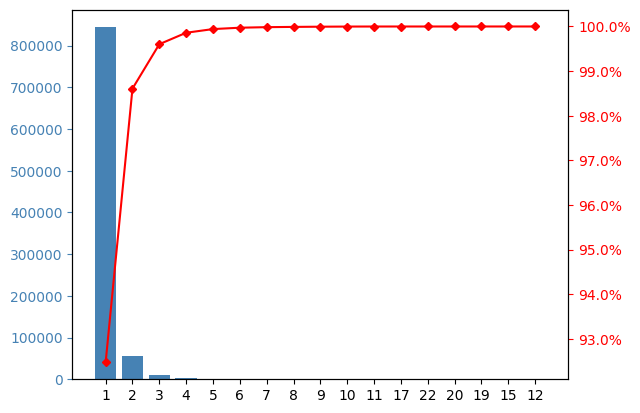

In [13]:
# define the astctics of the grapoh 
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter



color1 = 'steelblue'
color2 = 'red'
line_size = 4

fig , ax = plt.subplots()
ax.bar(total_reviewers.index , total_reviewers["total_reviewers"], color = color1)
ax.set_xticks(total_reviewers.index, total_reviewers["total_reviews"].values)

ax2 = ax.twinx()
ax2.plot(total_reviewers.index , total_reviewers["cumperc"], color = color2, marker= "D", ms = line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis = 'y' , colors = color1)
ax2.tick_params(axis = 'y' , colors = color2)


plt.show()


# We don't need to memorize the code above, just know what the code is carrying out.
# By looking at the graph, 92 percent of the reviewers published 1 review.





In [14]:
top_reviewers = _deepnote_execute_sql('-- Masking our data so that we get top reviewers by restricting the values of total_upvotes and reviews_published. \n\nSELECT \nauthor_steamid \nFROM qualities\nWHERE \ntotal_upvotes >= 550 \nAND \nreviews_published >= 3 ', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
top_reviewers

,author_steamid
0,76561198315585536
1,76561198192166873
2,76561198084635692
3,76561198081631374
4,76561198020313592
5,76561197992694498
6,76561198072325646
7,76561197971724802
8,76561198001507954
9,76561197970314107


In [15]:
top_reviewers_dataset = _deepnote_execute_sql('SELECT \n*\nFROM \nfull_dataset\nwhere author_steamid in (\n    SELECT \n    author_steamid \n    FROM qualities\n    WHERE \n    total_upvotes >= 550 \n    AND \n    reviews_published >= 3 \n)\n    -- Create a dataframe to show data on the top_reviewers based on the qualities dataframe we created above. \n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
top_reviewers_dataset

,review_id,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_forever_2,author_last_played,app_id,app_name,...,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,54836996,76561198061514868,1513,231,4193.0,0.0,4193.0,1.547179e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1566902925,1566902925,False,633,23,0.896432,33,False,True,False
1,49704965,76561198010371788,570,153,1994.0,0.0,586.0,1.588529e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1553305262,1553305354,True,655,227,0.942581,41,True,False,False
2,48643868,76561198097450702,323,135,786.0,0.0,481.0,1.575289e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1548846113,1548846113,True,810,107,0.951849,27,False,False,False
3,40540060,76561198137866454,148,54,28537.0,337.0,2429.0,1.610630e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1520097008,1573222171,True,10,2,0.606452,0,True,False,False
4,39640371,76561198060992774,129,22,2725.0,0.0,827.0,1.518390e+09,489830,The Elder Scrolls V: Skyrim Special Edition,...,1517008583,1517008706,True,39,4,0.741645,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,47293144,76561198084635692,1702,287,719.0,0.0,719.0,1.543863e+09,760060,Mutant Year Zero: Road to Eden,...,1543938845,1543939905,True,89,6,0.692581,58,False,True,False
246,47292610,76561198020313592,773,363,1392.0,0.0,1392.0,1.543940e+09,760060,Mutant Year Zero: Road to Eden,...,1543936637,1607719148,True,463,9,0.926919,30,False,True,False
247,57535307,76561198192166873,2349,530,157.0,0.0,90.0,1.574345e+09,701160,Kingdom Two Crowns,...,1574262671,1574262671,True,8,12,0.621079,0,False,True,False
248,56763901,76561198061514868,1513,231,399.0,0.0,96.0,1.573479e+09,517630,Just Cause 4,...,1573225007,1573225074,True,7,5,0.509776,0,False,False,False


Reviewer Analysis    

- Number of Games

- Playtime per game Reviewed

Review Analysis

- Character length of average review

- Total comments

In [16]:
games_owned = _deepnote_execute_sql('SELECT\nauthor_steamid,\nMAX(author_num_games_owned) AS games_owned\nFROM top_reviewers_dataset\nGROUP BY author_steamid\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
games_owned

,author_steamid,games_owned
0,76561198061514868,1513
1,76561198010371788,570
2,76561198097450702,323
3,76561198137866454,148
4,76561198060992774,129
5,76561198117201776,120
6,76561198053251883,355
7,76561197961038549,4745
8,76561198046478440,118
9,76561198158929380,890


In [17]:
import plotly.express as px

px.histogram(games_owned , x = 'games_owned' , nbins = 50 ,  template= "simple_white")

In [18]:
playtime_per_game = _deepnote_execute_sql('SELECT \nround(MAX(author_playtime_forever) / MAX(author_num_games_owned),0) as playtime_per_game,\nauthor_steamid\nfrom top_reviewers_dataset\ngroup by author_steamid', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
playtime_per_game

,playtime_per_game,author_steamid
0,3.0,76561198061514868
1,30.0,76561198010371788
2,135.0,76561198097450702
3,193.0,76561198137866454
4,37.0,76561198060992774
5,153.0,76561198117201776
6,18.0,76561198053251883
7,4.0,76561197961038549
8,157.0,76561198046478440
9,2.0,76561198158929380


In [19]:
px.histogram(playtime_per_game , x = 'playtime_per_game' ,nbins = 40 , template='simple_white')

In [20]:
word_count = _deepnote_execute_sql('SELECT \nlen(review) as word_count,\nauthor_steamid\nFROM top_reviewers_dataset\norder by word_count desc', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
word_count

,word_count,author_steamid
0,8000,76561198117201776
1,8000,76561198084635692
2,7998,76561198084635692
3,7996,76561197992694498
4,7993,76561198084635692
...,...,...
245,1,76561198315585536
246,1,76561198315585536
247,1,76561198315585536
248,1,76561198315585536


In [21]:
px.histogram(word_count , x = "word_count" , template="simple_white")

In [22]:
comments = _deepnote_execute_sql('SELECT \nsum(comment_count) as total_comments,\nauthor_steamid\nFROM top_reviewers_dataset\nGROUP BY 2 ', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
comments

,total_comments,author_steamid
0,35.0,76561198061514868
1,42.0,76561198010371788
2,27.0,76561198097450702
3,60.0,76561198137866454
4,20.0,76561198060992774
5,84.0,76561198117201776
6,20.0,76561198053251883
7,8.0,76561197961038549
8,35.0,76561198046478440
9,49.0,76561198158929380


In [23]:
px.histogram(comments , x = 'total_comments' , template= "simple_white")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a4a2cca1-2900-423e-9c98-2d83e24d256c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>